Advanced Data Mining Project

Elida and Dalila 

In [765]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_auc_score,
                             classification_report, confusion_matrix, roc_curve, auc)
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc


In [766]:
df = pd.read_csv(r'dataset_traffic_accident_prediction1.csv')


In [767]:
print(df.head())


  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  Accident  
0          Car        51.0               48

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


Transforming the data

Transforming the values for the weather features
Clear: 0 
Rainy: 1 
Foggy: 2 
Snowy: 3 
Stormy: 4

In [769]:
weather_mapping = {
    'Clear': 0,
    'Rainy': 1,
    'Foggy': 2,
    'Snowy': 3,
    'Stormy': 4
}
df['Weather'] = df['Weather'].map(weather_mapping)

unique_values = df['Weather'].unique()
print(unique_values)


[ 1.  0.  2.  4. nan  3.]


Road Type Transformation
Highway: 0,
City Road: 1,
Rural Road: 2,
Mountain Road: 3

In [770]:
road_type_mapping = {
    'Highway': 0,
    'City Road': 1,
    'Rural Road': 2,
    'Mountain Road': 3
}

df['Road_Type'] = df['Road_Type'].map(road_type_mapping)

unique_values = df['Road_Type'].unique()
print(unique_values)


[ 1.  2.  0. nan  3.]


Time of Day Transformation
Morning: 0,
Afternoon: 1,
Evening: 2,
Night: 3

In [771]:
time_of_day_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}
df['Time_of_Day'] = df['Time_of_Day'].map(time_of_day_mapping)

unique_values = df['Time_of_Day'].unique()
print(unique_values)


[ 0.  3.  2.  1. nan]


Transforming the feature Accident Severity : 
Low - 0 ; 
Moderate - 1; 
High - 2

In [772]:
accident_severity_mapping = {
    'Low': 0, 
    'Moderate': 1, 
    'High': 2
    }
df['Accident_Severity'] = df['Accident_Severity'].map(accident_severity_mapping)

print(df['Accident_Severity'].unique())

[nan  1.  0.  2.]


Road Condition Transformation
Dry: 0, 
Wet: 1, 
Icy: 2, 
Under Construction: 3

In [773]:
road_condition_mapping = {
    'Dry': 0, 
    'Wet': 1, 
    'Icy': 2, 
    'Under Construction': 3
    }
df['Road_Condition'] = df['Road_Condition'].map(road_condition_mapping)

print(df['Road_Condition'].unique())

[ 1.  2.  3.  0. nan]


Vehicle Type Transformation
Car: 0, 
Truck: 1, 
Motorcycle: 2, 
Bus: 3

In [774]:
vehicle_type_mapping = {
    'Car': 0, 
    'Truck': 1, 
    'Motorcycle': 2, 
    'Bus': 3
    }
df['Vehicle_Type'] = df['Vehicle_Type'].map(vehicle_type_mapping)

print(df['Vehicle_Type'].unique())

[ 0.  1.  3.  2. nan]


Road Light Condition Transformation
Daylight: 0, 
Artificial Light: 1, 
No Light: 2

In [775]:
road_light_condition_mapping = {
    'Daylight': 0, 
    'Artificial Light': 1, 
    'No Light': 2
    }

df['Road_Light_Condition'] = df['Road_Light_Condition'].map(road_light_condition_mapping)

print(df['Road_Light_Condition'].unique())


[ 1.  0.  2. nan]


In [776]:
# to check how many rows of data we have
total_rows = df.shape[0]
print("Total number of rows:", total_rows)


Total number of rows: 840


In [777]:
missing_values = df.isnull().sum()
print(missing_values)


Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64


In [778]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)
missing_columns = missing_percentage[missing_percentage > 0]
print("Columns with missing values:")
print(missing_columns)

Weather                 5.0
Road_Type               5.0
Time_of_Day             5.0
Traffic_Density         5.0
Speed_Limit             5.0
Number_of_Vehicles      5.0
Driver_Alcohol          5.0
Accident_Severity       5.0
Road_Condition          5.0
Vehicle_Type            5.0
Driver_Age              5.0
Driver_Experience       5.0
Road_Light_Condition    5.0
Accident                5.0
dtype: float64
Columns with missing values:
Weather                 5.0
Road_Type               5.0
Time_of_Day             5.0
Traffic_Density         5.0
Speed_Limit             5.0
Number_of_Vehicles      5.0
Driver_Alcohol          5.0
Accident_Severity       5.0
Road_Condition          5.0
Vehicle_Type            5.0
Driver_Age              5.0
Driver_Experience       5.0
Road_Light_Condition    5.0
Accident                5.0
dtype: float64


In [779]:
total_columns = len(df.columns)
print("Total number of columns:", total_columns)

Total number of columns: 14


In [780]:
columns_with_missing_values = df.isnull().any()
number_of_columns_with_missing = columns_with_missing_values.sum()
print("Number of columns with at least one missing value:", number_of_columns_with_missing)

Number of columns with at least one missing value: 14


All 14 features have at least 1 missing value instance and based on the findings above all of the features have 42 missing instances or 5% of data is missing.

In [781]:
# We created three copies of the original df for different imputation techniques
df_deletion = df.copy()
df_mode_median_imputation = df.copy()


In [782]:
df_deletion.dropna(inplace=True)
print("Remaining rows in df_deletion:", len(df_deletion))

Remaining rows in df_deletion: 405


In [783]:
df_deletion.to_csv('df-deletion.csv', index=False)

In [784]:
df_deletion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 2 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               405 non-null    float64
 1   Road_Type             405 non-null    float64
 2   Time_of_Day           405 non-null    float64
 3   Traffic_Density       405 non-null    float64
 4   Speed_Limit           405 non-null    float64
 5   Number_of_Vehicles    405 non-null    float64
 6   Driver_Alcohol        405 non-null    float64
 7   Accident_Severity     405 non-null    float64
 8   Road_Condition        405 non-null    float64
 9   Vehicle_Type          405 non-null    float64
 10  Driver_Age            405 non-null    float64
 11  Driver_Experience     405 non-null    float64
 12  Road_Light_Condition  405 non-null    float64
 13  Accident              405 non-null    float64
dtypes: float64(14)
memory usage: 47.5 KB


Now we need to do the missing data imputation as well

In [785]:
df_mode_median_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    float64
 1   Road_Type             798 non-null    float64
 2   Time_of_Day           798 non-null    float64
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    float64
 8   Road_Condition        798 non-null    float64
 9   Vehicle_Type          798 non-null    float64
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    float64
 13  Accident              798 non-null    float64
dtypes: float64(14)
memory usage: 92.0 KB


In [786]:
# Printing unique values for each feature in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Weather: [ 1.  0.  2.  4. nan  3.]
Unique values in Road_Type: [ 1.  2.  0. nan  3.]
Unique values in Time_of_Day: [ 0.  3.  2.  1. nan]
Unique values in Traffic_Density: [ 1. nan  2.  0.]
Unique values in Speed_Limit: [100. 120.  60. 195.  30.  nan  50.  80. 200. 206. 178. 208. 213. 190.
 196. 188. 194. 189. 193. 185. 199. 192. 198. 212. 181.]
Unique values in Number_of_Vehicles: [ 5.  3.  4. 11.  2.  1. nan 12. 13. 14. 10.]
Unique values in Driver_Alcohol: [ 0.  1. nan]
Unique values in Accident_Severity: [nan  1.  0.  2.]
Unique values in Road_Condition: [ 1.  2.  3.  0. nan]
Unique values in Vehicle_Type: [ 0.  1.  3.  2. nan]
Unique values in Driver_Age: [51. 49. 54. 34. 62. 27. 29. 38. 50. 33. 47. 25. 67. 61. 46. 48. 53. 35.
 59. 32. 69. 68. 28. 40. 30. 60. 66. nan 63. 65. 18. 55. 45. 22. 26. 58.
 23. 57. 43. 41. 64. 42. 56. 52. 44. 20. 24. 19. 37. 21. 39. 36. 31.]
Unique values in Driver_Experience: [48. 43. 52. 31. 55. 26. 22. 29. 28. 38. 16. 63. 57. nan 41. 32

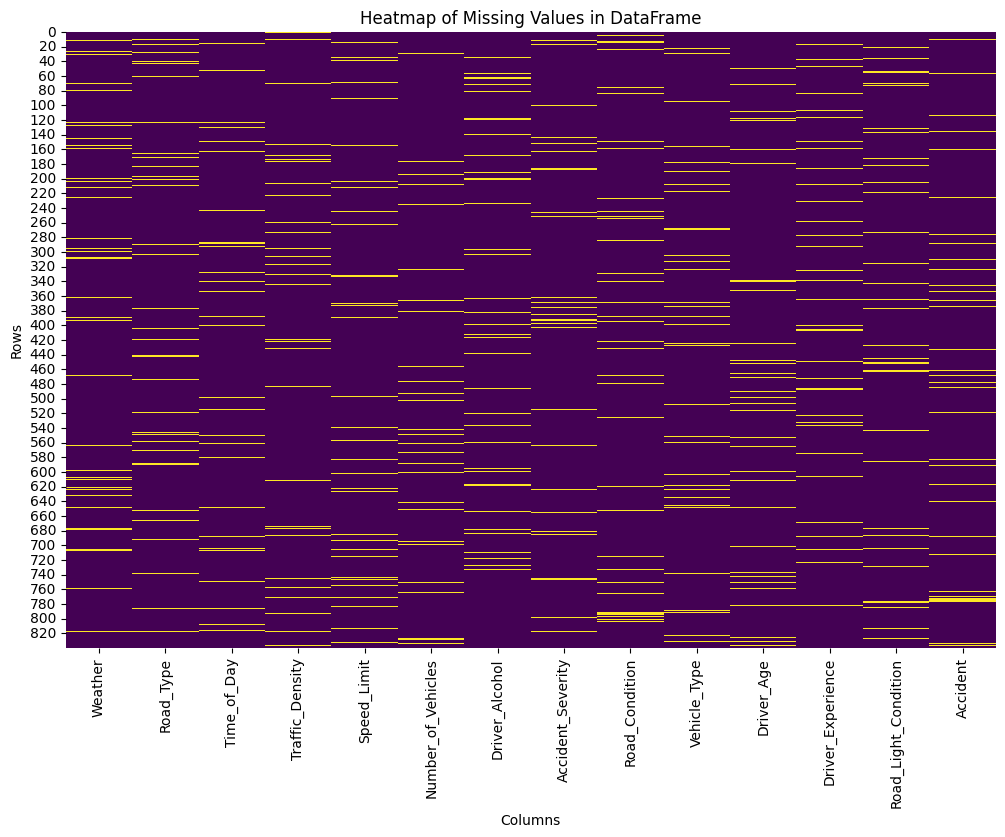

In [787]:
# Calculate missing values
missing_values = df.isnull()

# Create a heatmap to visualize missing values in the dataframe
plt.figure(figsize=(12, 8))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [788]:
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol', 'Vehicle_Type', 'Road_Light_Condition', 'Accident_Severity','Road_Condition','Accident']
numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']

In [789]:
# Mode imputation for categorical features
for col in categorical_cols:
    mode = df_mode_median_imputation[col].mode()[0]
    df_mode_median_imputation[col] = df_mode_median_imputation[col].fillna(mode)

# Median imputation for numerical features
for col in numerical_cols:
    median = df_mode_median_imputation[col].median()
    df_mode_median_imputation[col] = df_mode_median_imputation[col].fillna(median)


In [790]:
print(df_mode_median_imputation.isnull().sum())


Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


We will alo do rf imputation

In [791]:
df_rf_imputation = df.copy()

In [792]:
# Initialize the imputer
imputer_rf = IterativeImputer(estimator=RandomForestRegressor(), random_state=0, max_iter=25)

# Apply the imputer to your DataFrame
df_rf_imputation[df.columns] = imputer_rf.fit_transform(df_rf_imputation[df.columns])


C:\Users\elida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [793]:
print(df_rf_imputation.isnull().sum())


Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


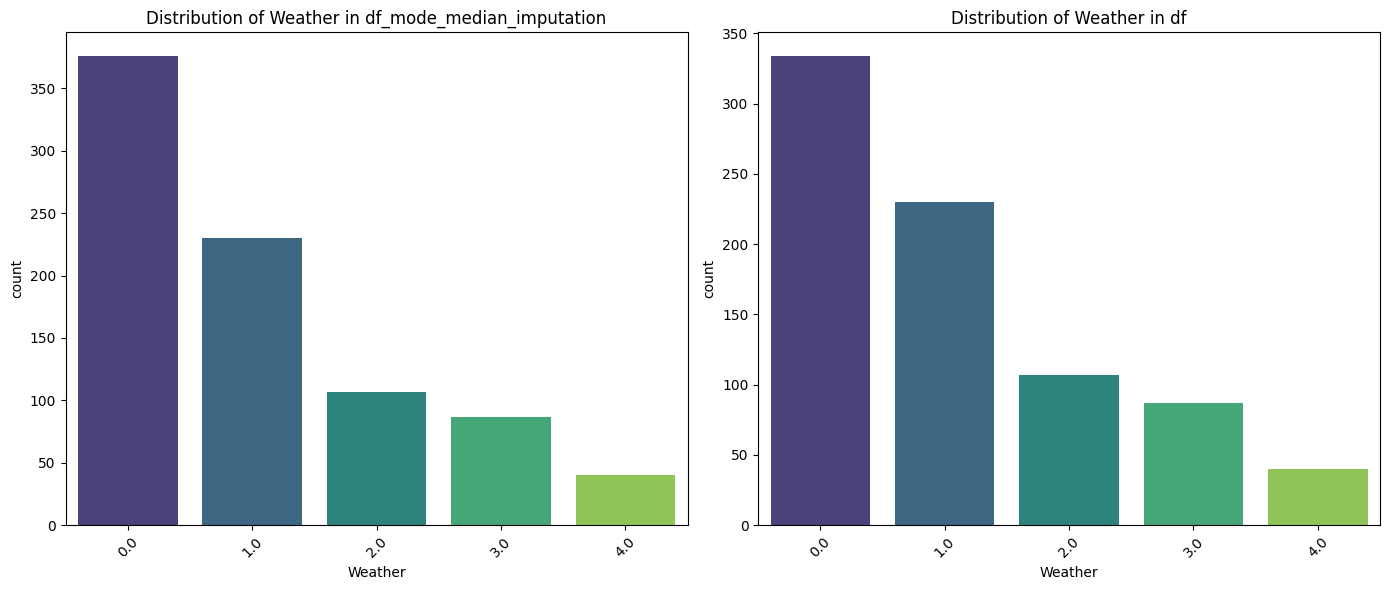

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


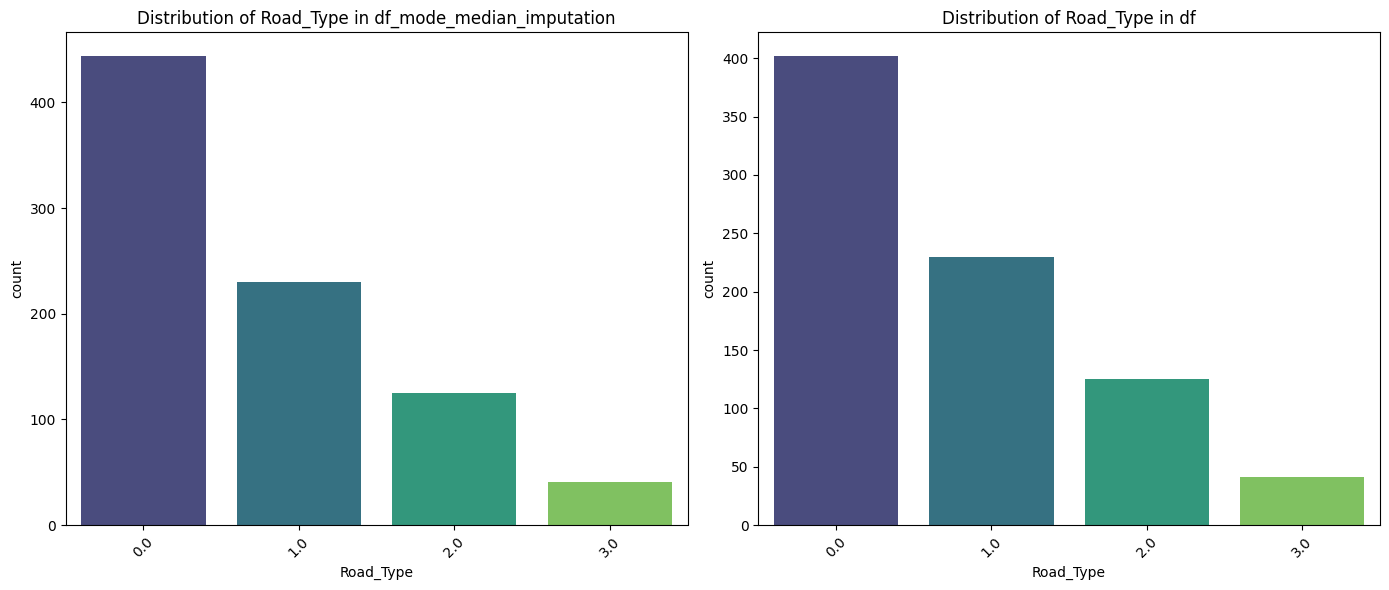

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


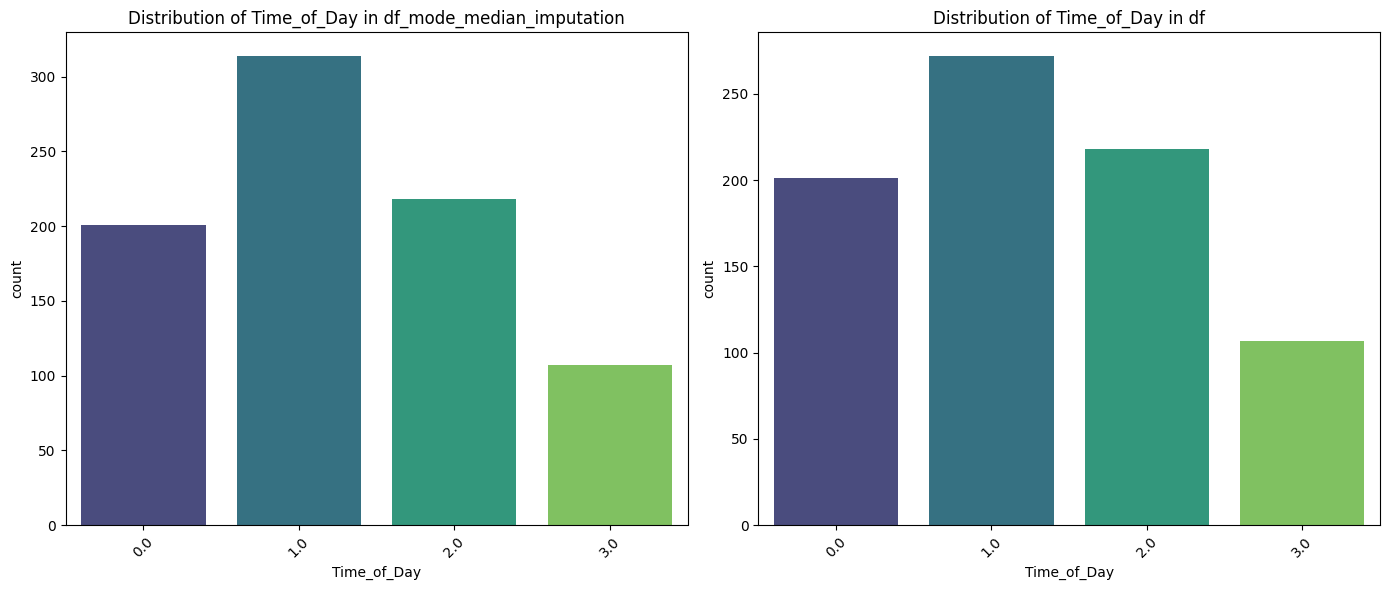

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


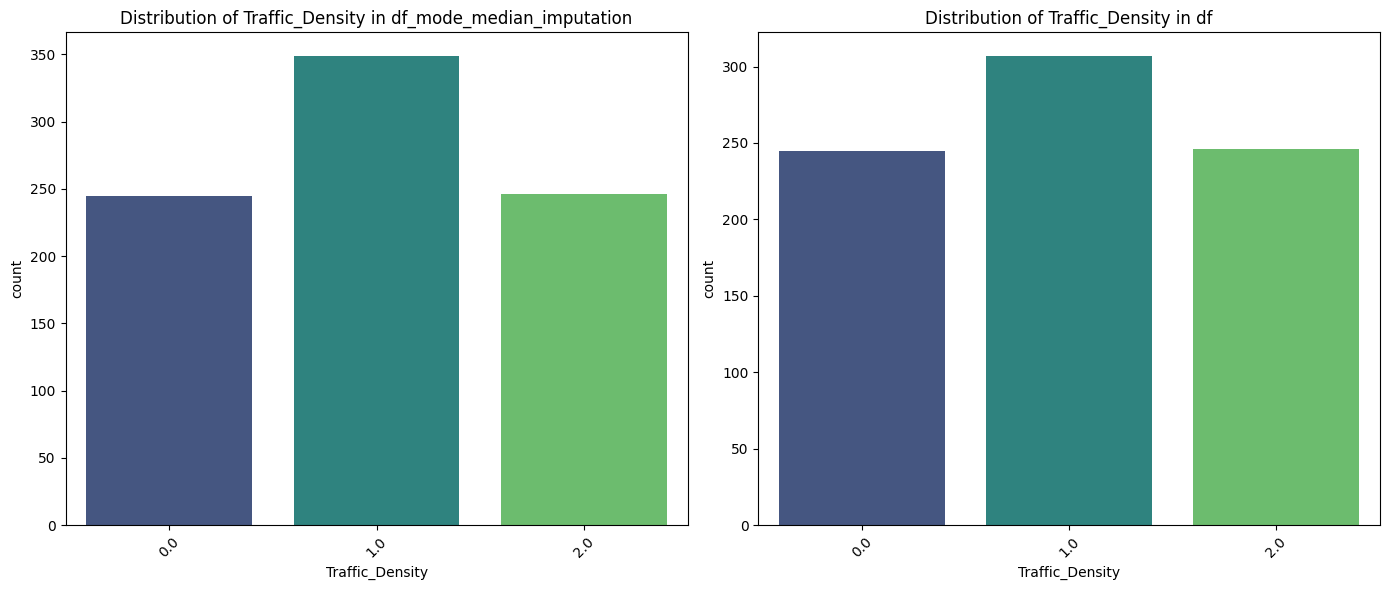

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


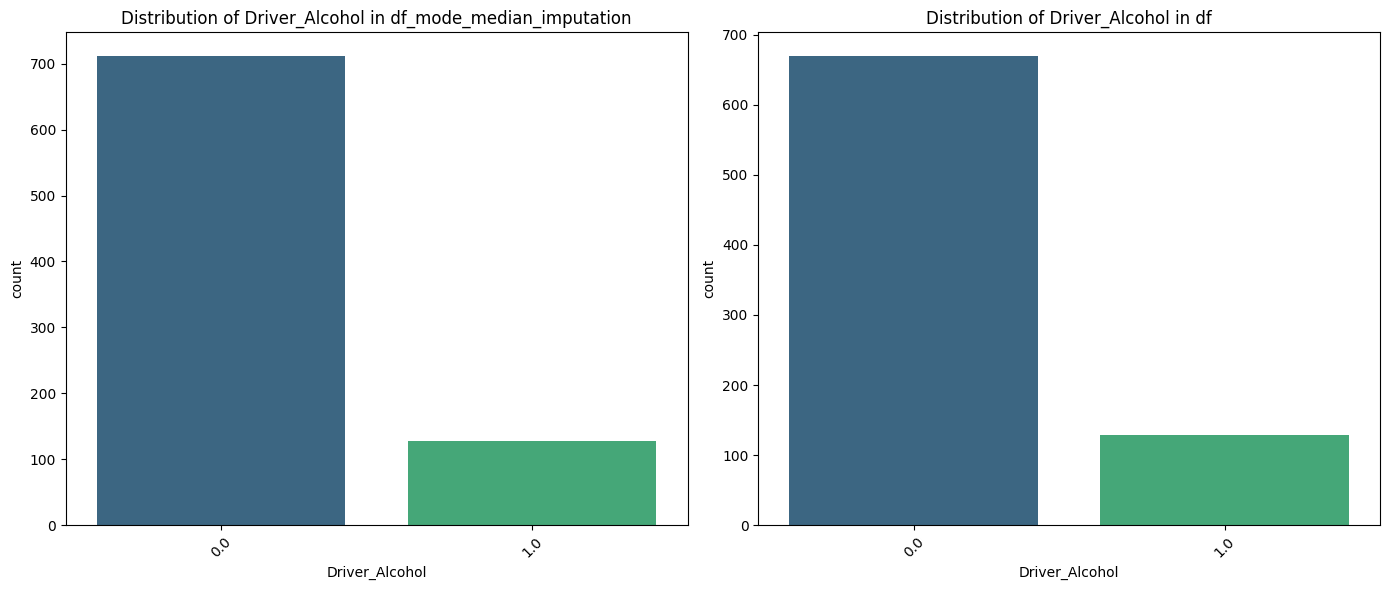

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


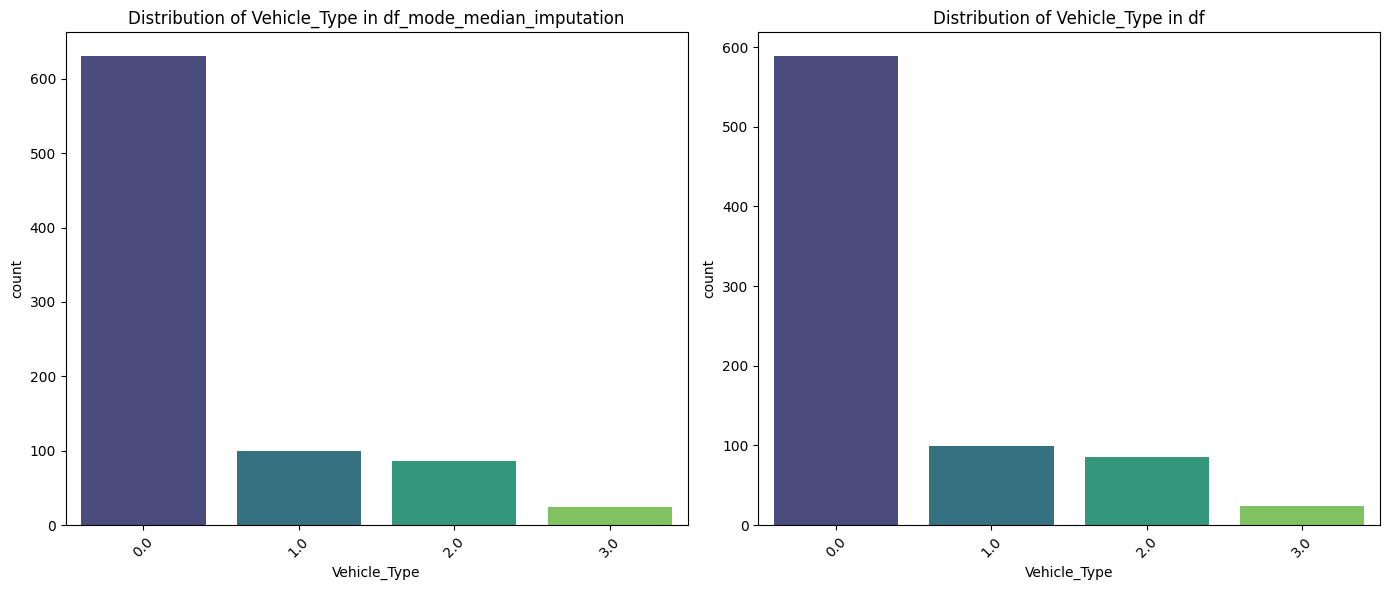

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


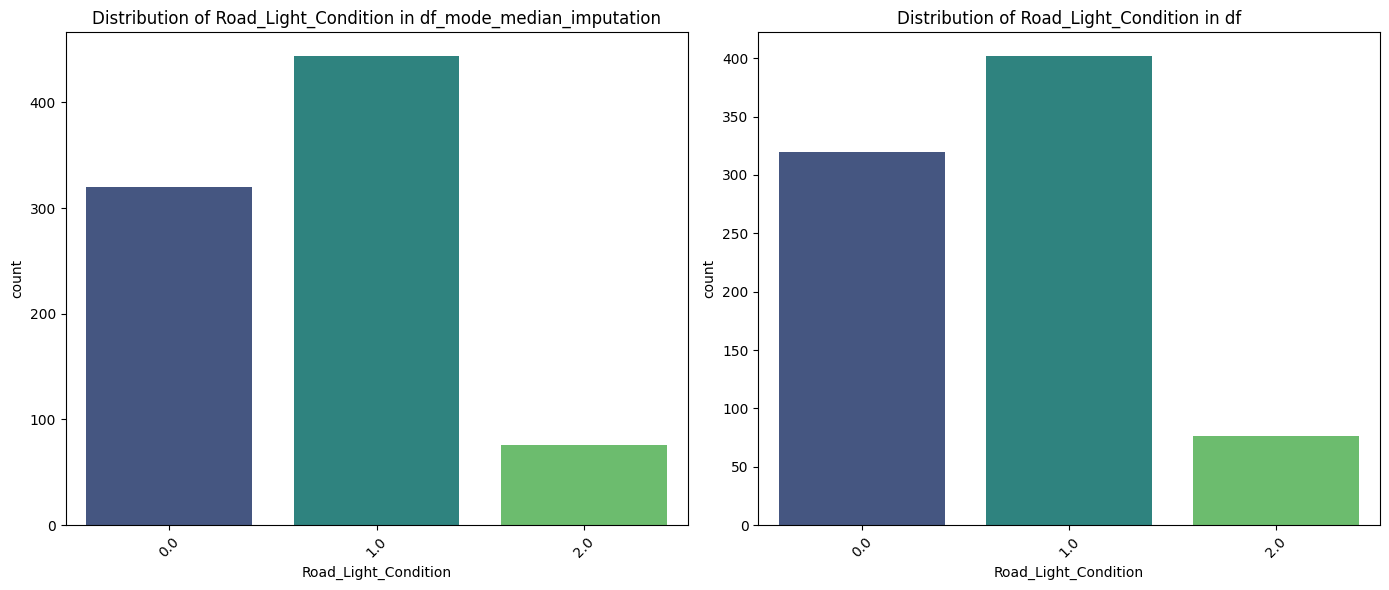

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


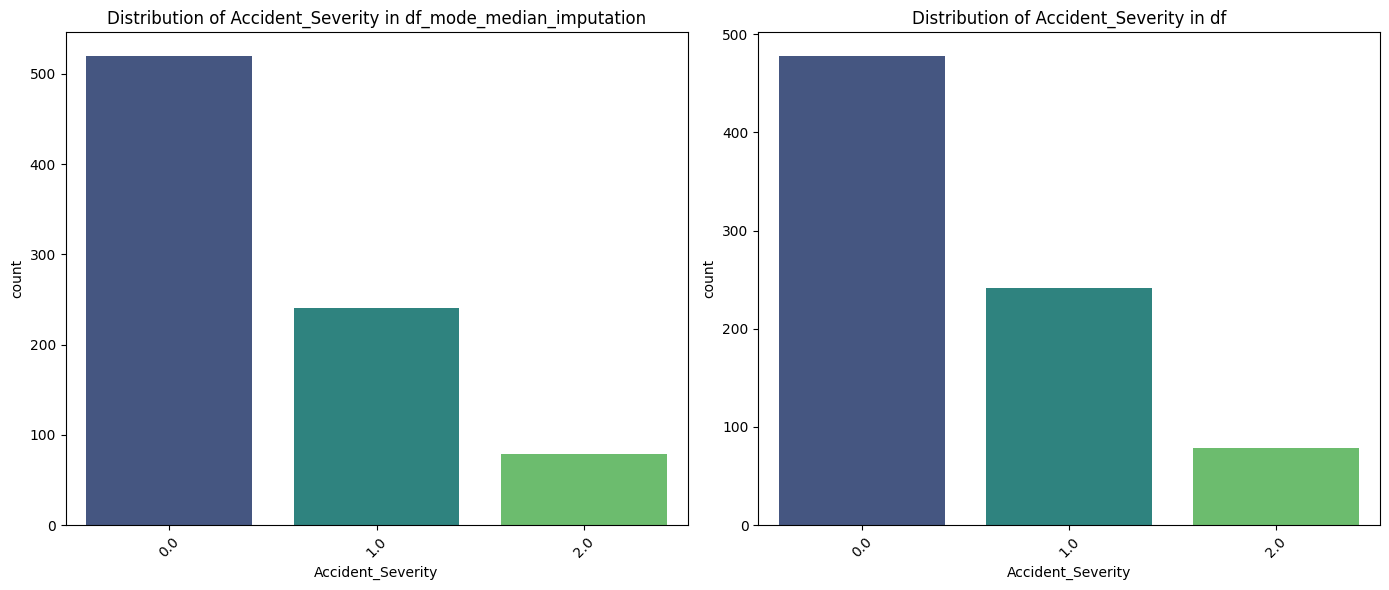

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


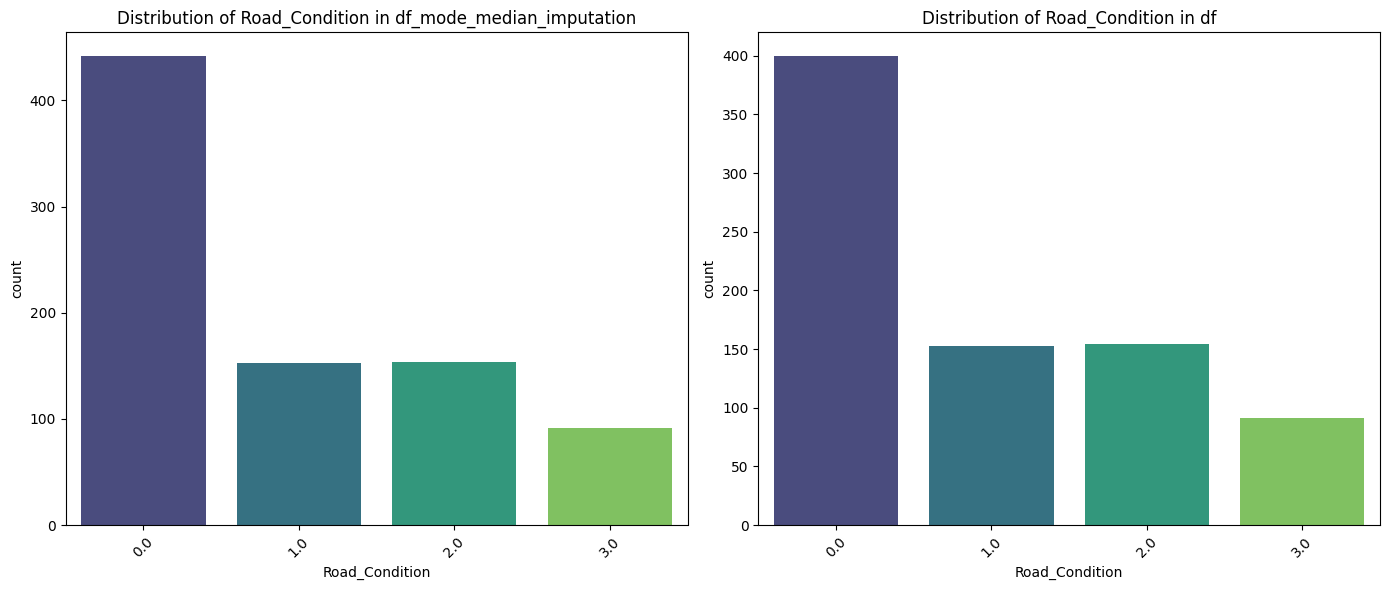

C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[feature_name], palette='viridis')
C:\Users\elida\AppData\Local\Temp\ipykernel_21496\3319135598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[feature_name], palette='viridis')


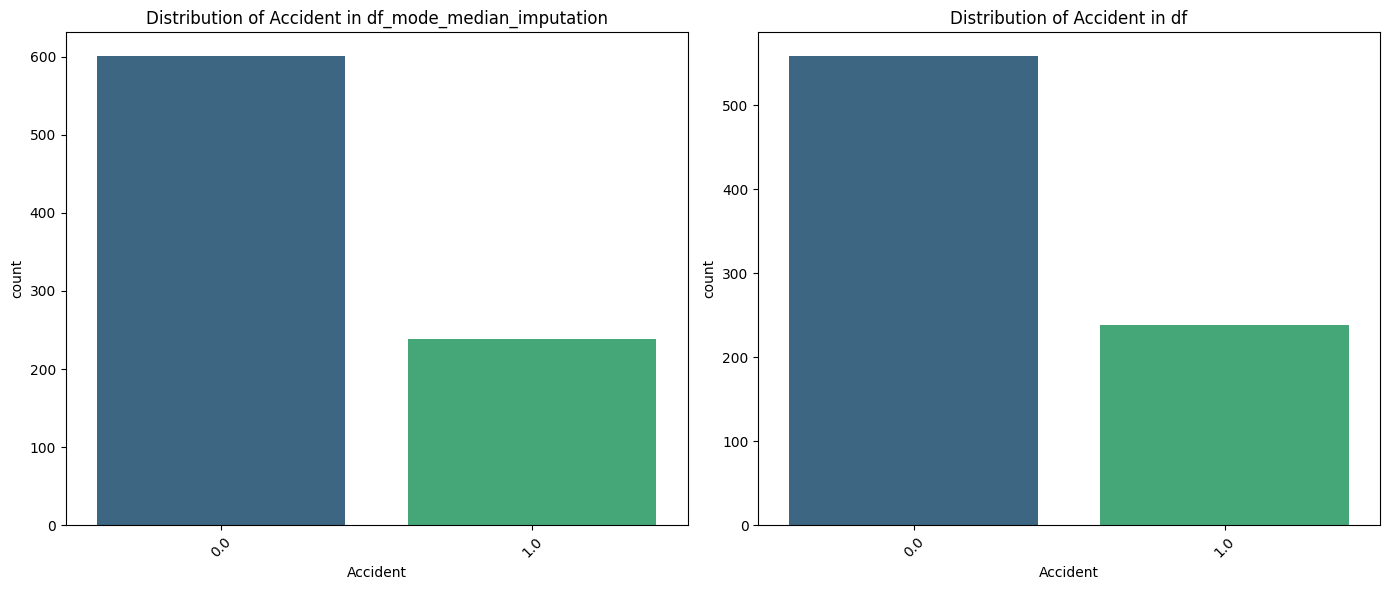

In [794]:
def plot_feature_distribution(df1, df2, feature_name):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)  # First subplot for df_mode_median_imputation
    sns.countplot(x=df1[feature_name], palette='viridis')
    plt.title(f'Distribution of {feature_name} in df_mode_median_imputation')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)  # Second subplot for df
    sns.countplot(x=df2[feature_name], palette='viridis')
    plt.title(f'Distribution of {feature_name} in df')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# List of features to plot
features = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol', 
            'Vehicle_Type', 'Road_Light_Condition', 'Accident_Severity', 'Road_Condition', 'Accident']

# Assuming df_mode_median_imputation and df are already loaded
for feature in features:
    plot_feature_distribution(df_mode_median_imputation, df, feature)


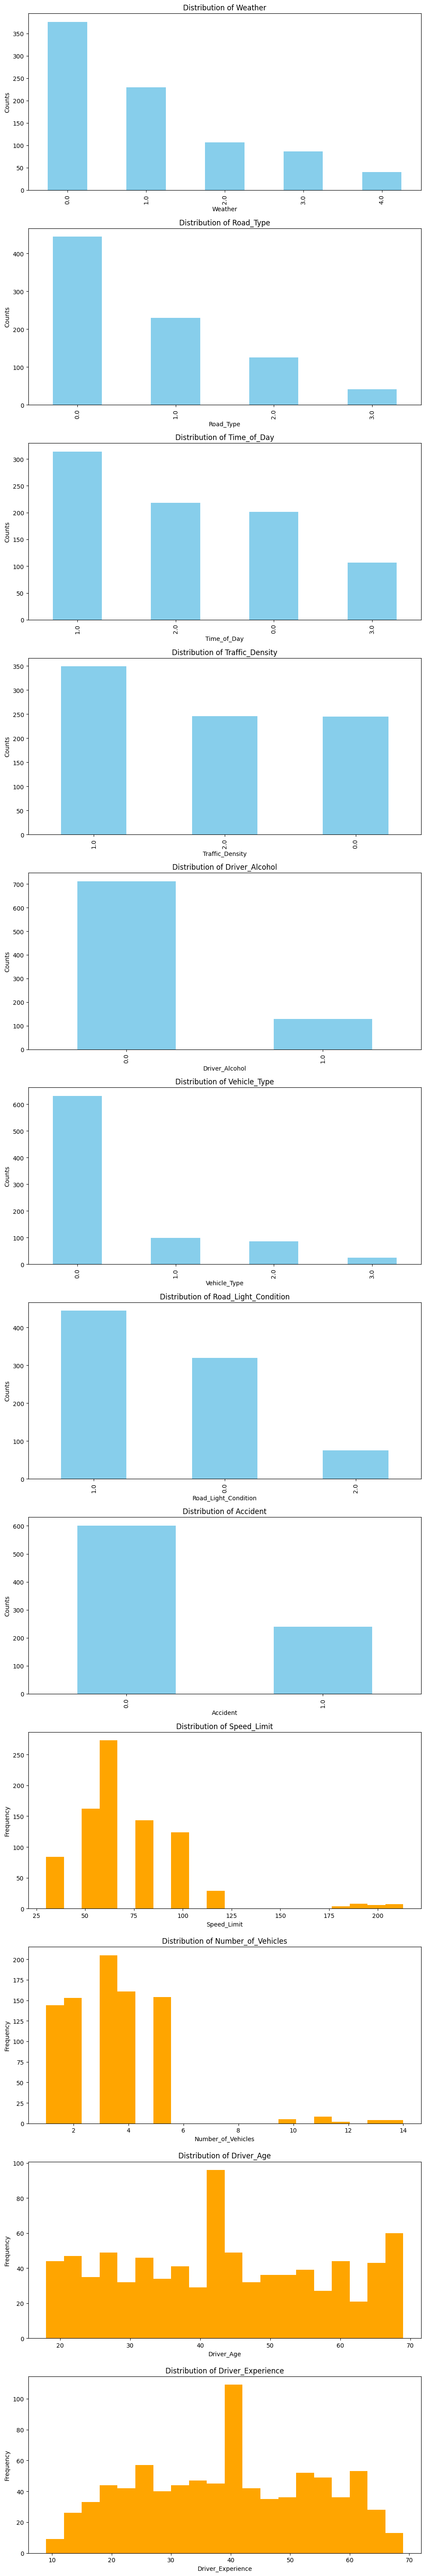

In [795]:
# Define categorical and numerical columns again (for clarity)
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol', 'Vehicle_Type', 'Road_Light_Condition', 'Accident']
numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']

# Setting up the plot dimensions
fig, ax = plt.subplots(len(categorical_cols) + len(numerical_cols), 1, figsize=(10, 5 * (len(categorical_cols) + len(numerical_cols))))

# Plotting categorical data
for i, col in enumerate(categorical_cols):
    df_mode_median_imputation[col].value_counts().plot(kind='bar', ax=ax[i], color='skyblue', title=f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Counts')

# Plotting numerical data
for i, col in enumerate(numerical_cols):
    df_mode_median_imputation[col].plot(kind='hist', bins=20, ax=ax[len(categorical_cols) + i], color='orange', title=f'Distribution of {col}')
    ax[len(categorical_cols) + i].set_xlabel(col)
    ax[len(categorical_cols) + i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


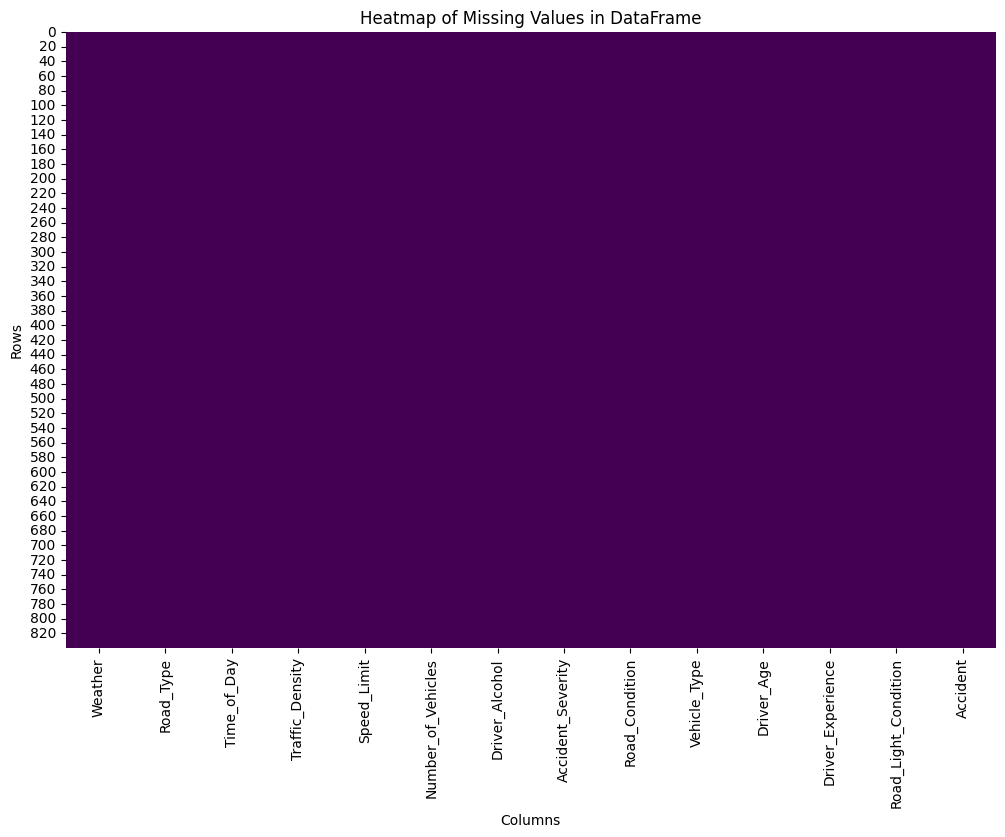

In [796]:
# Calculate missing values
missing_values = df_mode_median_imputation.isnull()

# Create a heatmap to visualize missing values in the dataframe
plt.figure(figsize=(12, 8))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


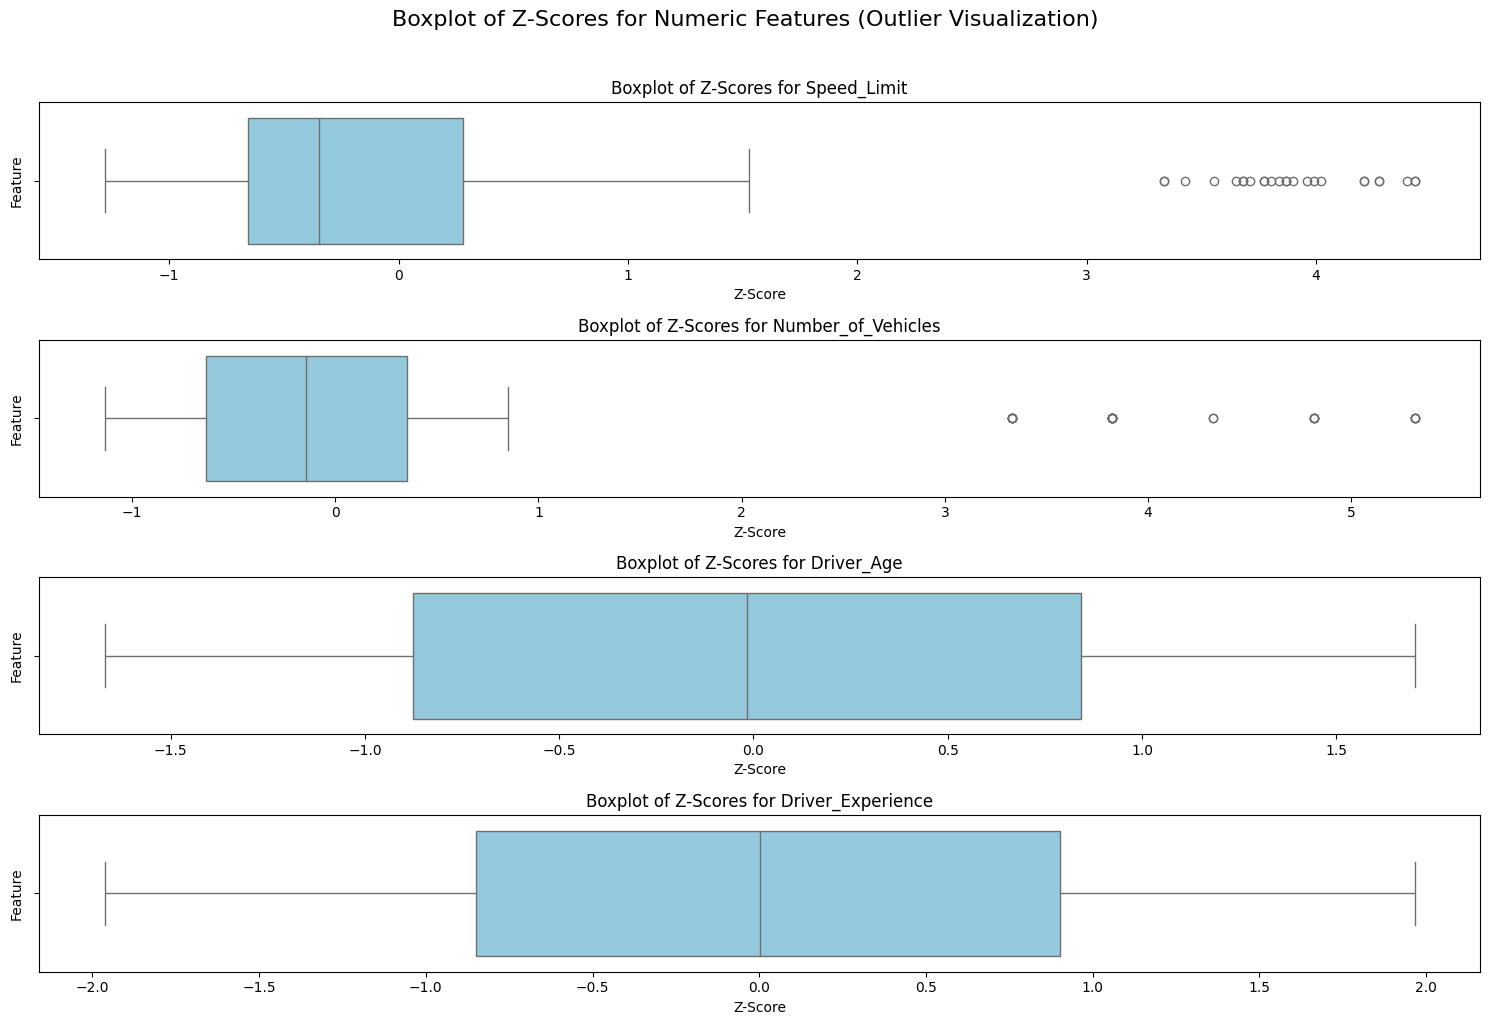

Outliers in Speed_Limit based on Z-Score:
     Speed_Limit
4          195.0
62         200.0
70         206.0
103        178.0
123        208.0
164        213.0
206        190.0
213        196.0
228        188.0
242        195.0
244        194.0
355        189.0
458        193.0
526        189.0
559        185.0
570        199.0
580        192.0
604        213.0
667        198.0
670        192.0
704        206.0
714        212.0
729        181.0
750        208.0
827        178.0
Outliers in Number_of_Vehicles based on Z-Score:
     Number_of_Vehicles
4                  11.0
62                 12.0
70                 13.0
103                12.0
123                11.0
164                11.0
206                14.0
213                11.0
228                10.0
242                14.0
355                13.0
458                11.0
526                14.0
559                13.0
570                11.0
580                10.0
604                14.0
667                11.0
670        

In [797]:
# Define categorical and numerical columns again (for clarity)
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol', 'Vehicle_Type', 'Road_Light_Condition', 'Accident']
numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']

# Setting up the plot dimensions for numerical columns
plt.figure(figsize=(15, 10))

# Using z-scores for outlier visualization
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    sns.boxplot(data=z_scores, orient='h', color='skyblue')
    plt.title(f'Boxplot of Z-Scores for {col}')
    plt.xlabel('Z-Score')
    plt.ylabel('Feature')

plt.suptitle('Boxplot of Z-Scores for Numeric Features (Outlier Visualization)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Print outliers based on Z-Score threshold (e.g., greater than 3 or less than -3)
for col in numerical_cols:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[np.abs(z_scores) > 3]
    print(f"Outliers in {col} based on Z-Score:")
    print(outliers[[col]])


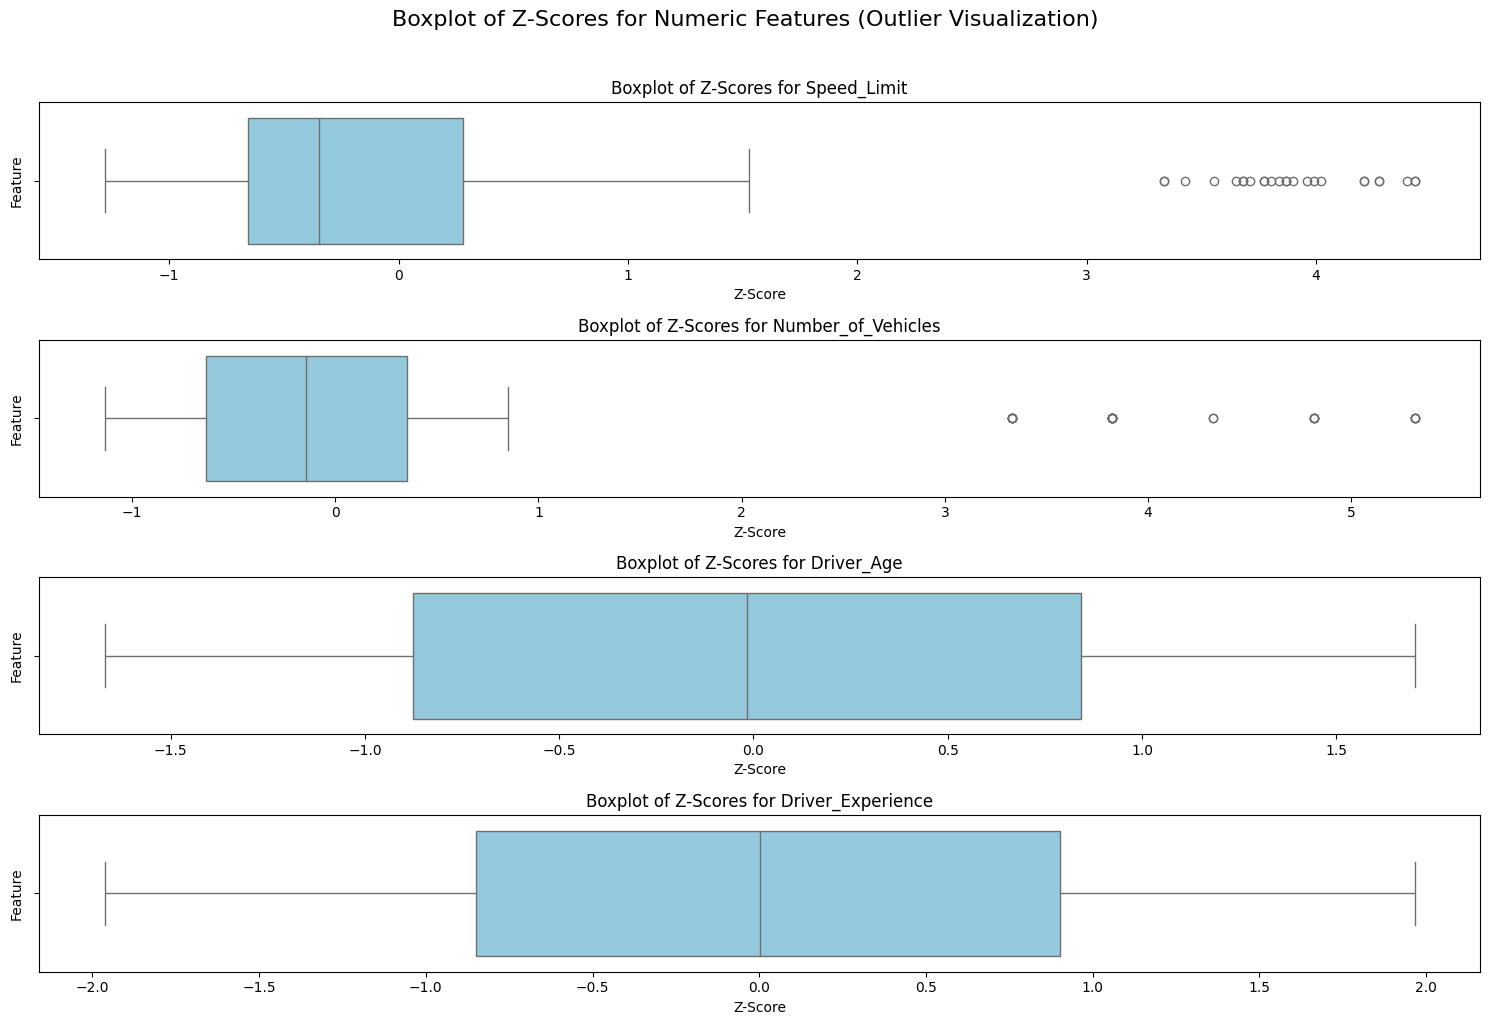

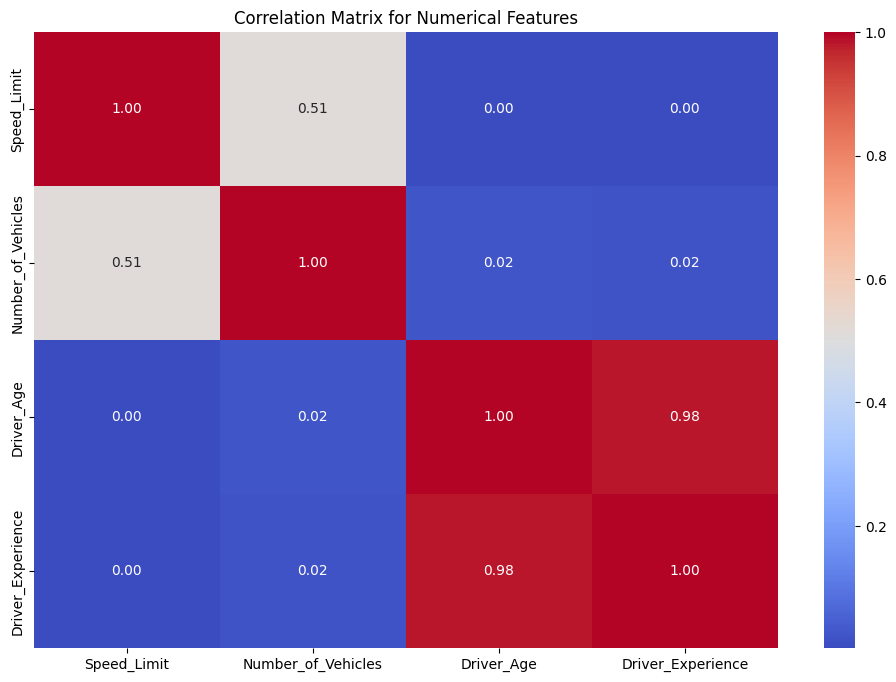

In [798]:
# Define categorical and numerical columns again (for clarity)
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol', 'Vehicle_Type', 'Road_Light_Condition', 'Accident']
numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']

# Setting up the plot dimensions for numerical columns
plt.figure(figsize=(15, 10))

# Using z-scores for outlier visualization
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    sns.boxplot(data=z_scores, orient='h', color='skyblue')
    plt.title(f'Boxplot of Z-Scores for {col}')
    plt.xlabel('Z-Score')
    plt.ylabel('Feature')

plt.suptitle('Boxplot of Z-Scores for Numeric Features (Outlier Visualization)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Print outliers based on Z-Score threshold (e.g., greater than 3 or less than -3)


# Correlation Matrix Visualization
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


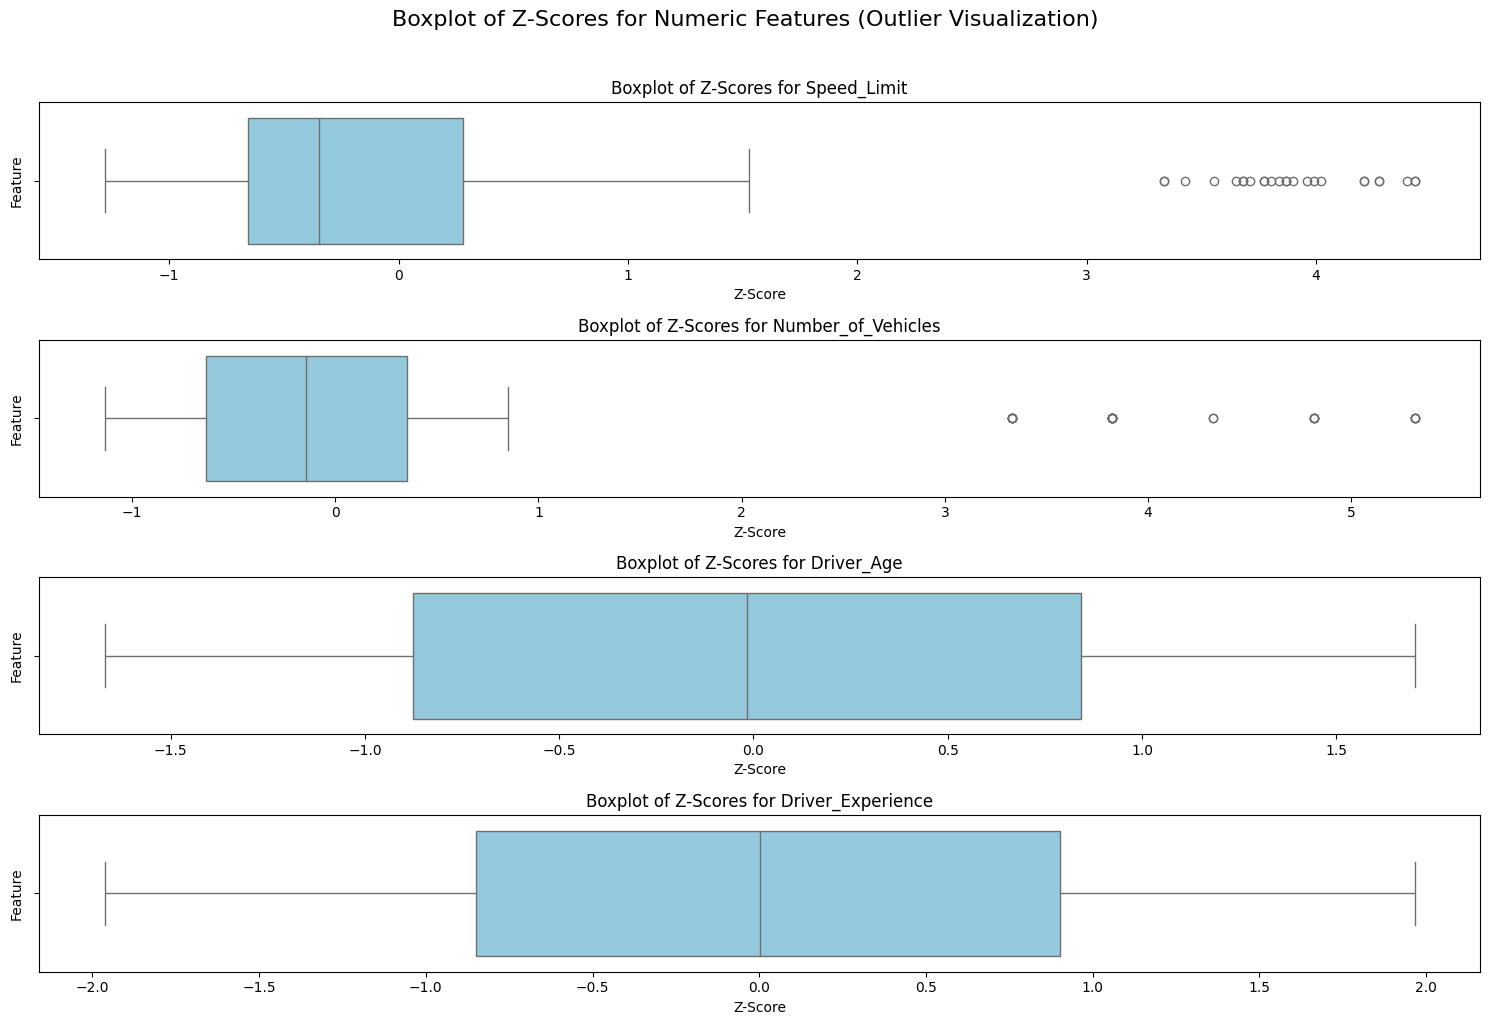

Outliers in Speed_Limit based on Z-Score:
     Speed_Limit
4          195.0
62         200.0
70         206.0
103        178.0
123        208.0
164        213.0
206        190.0
213        196.0
228        188.0
242        195.0
244        194.0
355        189.0
458        193.0
526        189.0
559        185.0
570        199.0
580        192.0
604        213.0
667        198.0
670        192.0
704        206.0
714        212.0
729        181.0
750        208.0
827        178.0
Outliers in Number_of_Vehicles based on Z-Score:
     Number_of_Vehicles
4                  11.0
62                 12.0
70                 13.0
103                12.0
123                11.0
164                11.0
206                14.0
213                11.0
228                10.0
242                14.0
355                13.0
458                11.0
526                14.0
559                13.0
570                11.0
580                10.0
604                14.0
667                11.0
670        

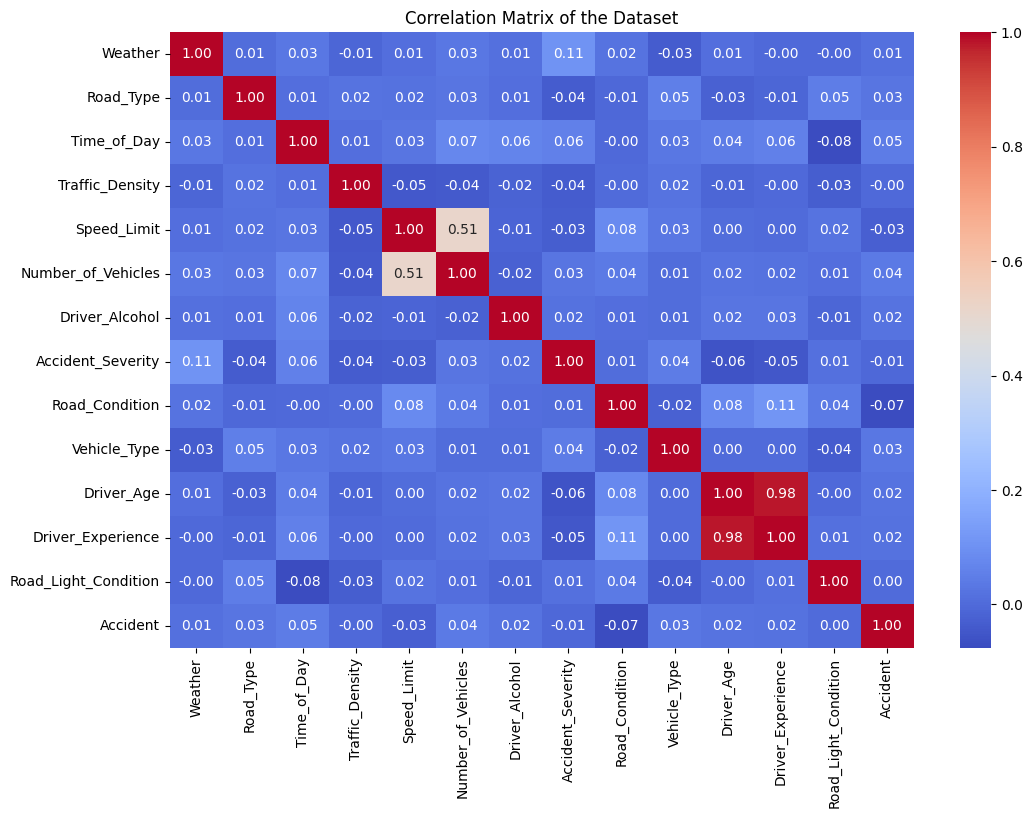

In [799]:
# Define categorical and numerical columns again (for clarity)
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol', 'Vehicle_Type', 'Road_Light_Condition', 'Accident']
numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']

# Setting up the plot dimensions for numerical columns
plt.figure(figsize=(15, 10))

# Using z-scores for outlier visualization
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    sns.boxplot(data=z_scores, orient='h', color='skyblue')
    plt.title(f'Boxplot of Z-Scores for {col}')
    plt.xlabel('Z-Score')
    plt.ylabel('Feature')

plt.suptitle('Boxplot of Z-Scores for Numeric Features (Outlier Visualization)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Print outliers based on Z-Score threshold (e.g., greater than 3 or less than -3)
for col in numerical_cols:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[np.abs(z_scores) > 3]
    print(f"Outliers in {col} based on Z-Score:")
    print(outliers[[col]])

# Correlation Matrix Visualization
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of the Dataset')
plt.show()


In [800]:
df_deletion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 2 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               405 non-null    float64
 1   Road_Type             405 non-null    float64
 2   Time_of_Day           405 non-null    float64
 3   Traffic_Density       405 non-null    float64
 4   Speed_Limit           405 non-null    float64
 5   Number_of_Vehicles    405 non-null    float64
 6   Driver_Alcohol        405 non-null    float64
 7   Accident_Severity     405 non-null    float64
 8   Road_Condition        405 non-null    float64
 9   Vehicle_Type          405 non-null    float64
 10  Driver_Age            405 non-null    float64
 11  Driver_Experience     405 non-null    float64
 12  Road_Light_Condition  405 non-null    float64
 13  Accident              405 non-null    float64
dtypes: float64(14)
memory usage: 47.5 KB


In [801]:
unique_accident_values = df_deletion['Accident'].unique()
print("Unique values in the 'Accident' column:", unique_accident_values)

Unique values in the 'Accident' column: [0. 1.]


In [802]:
# Convert 'Accident' column to int
df_deletion['Accident'] = df_deletion['Accident'].astype(int)
df_mode_median_imputation['Accident'] = df_mode_median_imputation['Accident'].astype(int)
df_rf_imputation['Accident'] = df_rf_imputation['Accident'].astype(int)


In [803]:


def train_and_evaluate(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the KNN classifier
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for AUC

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    bal_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']  # Corrected here
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {bal_accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {auc_score:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

train_and_evaluate(df_deletion, "Complete Case Deletion")
train_and_evaluate(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy: 0.64
Balanced Accuracy: 0.49
Sensitivity: 0.11
Specificity: 0.87
AUC: 0.51
F1 Score: 0.15

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy: 0.70
Balanced Accuracy: 0.56
Sensitivity: 0.19
Specificity: 0.92
AUC: 0.52
F1 Score: 0.28

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy: 0.67
Balanced Accuracy: 0.53
Sensitivity: 0.17
Specificity: 0.90
AUC: 0.50
F1 Score: 0.24



In [804]:
def train_and_evaluate(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the KNN classifier
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for AUC

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    bal_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']  # Corrected here
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {bal_accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {auc_score:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

train_and_evaluate(df_deletion, "Complete Case Deletion")
train_and_evaluate(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate(df_rf_imputation, "Random Forest Imputation")

Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy: 0.62
Balanced Accuracy: 0.46
Sensitivity: 0.08
Specificity: 0.84
AUC: 0.47
F1 Score: 0.11

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy: 0.70
Balanced Accuracy: 0.57
Sensitivity: 0.24
Specificity: 0.91
AUC: 0.55
F1 Score: 0.32

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy: 0.70
Balanced Accuracy: 0.56
Sensitivity: 0.20
Specificity: 0.91
AUC: 0.56
F1 Score: 0.28



Tried with 10 fold cross validation

In [805]:
def train_and_evaluate_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=5)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Evaluate model accuracy using cross-validation, scoring on accuracy, balanced_accuracy, and roc_auc
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Use cross_val_predict for classification report and confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]  # probabilities for AUC

    # Classification report and confusion matrix
    report = classification_report(y, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.65 ± 0.07
Balanced Accuracy (CV Mean): 0.53 ± 0.06
Sensitivity: 0.23
Specificity: 0.83
AUC (CV Mean): 0.56 ± 0.08
F1 Score: 0.28

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.70 ± 0.03
Balanced Accuracy (CV Mean): 0.55 ± 0.03
Sensitivity: 0.21
Specificity: 0.89
AUC (CV Mean): 0.53 ± 0.06
F1 Score: 0.28

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.69 ± 0.03
Balanced Accuracy (CV Mean): 0.54 ± 0.04
Sensitivity: 0.18
Specificity: 0.89
AUC (CV Mean): 0.53 ± 0.07
F1 Score: 0.25



Tried with 15 fold cross validation

In [806]:
def train_and_evaluate_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=3)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Evaluate model accuracy using cross-validation, scoring on accuracy, balanced_accuracy, and roc_auc
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Use cross_val_predict for classification report and confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]  # probabilities for AUC

    # Classification report and confusion matrix
    report = classification_report(y, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.64 ± 0.06
Balanced Accuracy (CV Mean): 0.53 ± 0.06
Sensitivity: 0.25
Specificity: 0.80
AUC (CV Mean): 0.55 ± 0.06
F1 Score: 0.29

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.66 ± 0.04
Balanced Accuracy (CV Mean): 0.53 ± 0.03
Sensitivity: 0.24
Specificity: 0.82
AUC (CV Mean): 0.53 ± 0.04
F1 Score: 0.28

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.66 ± 0.04
Balanced Accuracy (CV Mean): 0.53 ± 0.05
Sensitivity: 0.23
Specificity: 0.83
AUC (CV Mean): 0.54 ± 0.06
F1 Score: 0.27



In [807]:
def train_and_evaluate_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=7)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Evaluate model accuracy using cross-validation, scoring on accuracy, balanced_accuracy, and roc_auc
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Use cross_val_predict for classification report and confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]  # probabilities for AUC

    # Classification report and confusion matrix
    report = classification_report(y, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.65 ± 0.04
Balanced Accuracy (CV Mean): 0.50 ± 0.04
Sensitivity: 0.12
Specificity: 0.87
AUC (CV Mean): 0.51 ± 0.09
F1 Score: 0.17

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.69 ± 0.03
Balanced Accuracy (CV Mean): 0.53 ± 0.03
Sensitivity: 0.16
Specificity: 0.91
AUC (CV Mean): 0.52 ± 0.05
F1 Score: 0.23

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.68 ± 0.03
Balanced Accuracy (CV Mean): 0.51 ± 0.03
Sensitivity: 0.13
Specificity: 0.90
AUC (CV Mean): 0.51 ± 0.07
F1 Score: 0.19



In [808]:
def train_and_evaluate_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=5)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

    # Evaluate model accuracy using cross-validation, scoring on accuracy, balanced_accuracy, and roc_auc
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Use cross_val_predict for classification report and confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]  # probabilities for AUC

    # Classification report and confusion matrix
    report = classification_report(y, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.65 ± 0.07
Balanced Accuracy (CV Mean): 0.52 ± 0.07
Sensitivity: 0.22
Specificity: 0.83
AUC (CV Mean): 0.55 ± 0.09
F1 Score: 0.27

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.70 ± 0.03
Balanced Accuracy (CV Mean): 0.55 ± 0.04
Sensitivity: 0.21
Specificity: 0.90
AUC (CV Mean): 0.53 ± 0.08
F1 Score: 0.29

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.69 ± 0.03
Balanced Accuracy (CV Mean): 0.54 ± 0.04
Sensitivity: 0.19
Specificity: 0.89
AUC (CV Mean): 0.52 ± 0.08
F1 Score: 0.26



In [809]:
def train_and_evaluate_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=3)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

    # Evaluate model accuracy using cross-validation, scoring on accuracy, balanced_accuracy, and roc_auc
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Use cross_val_predict for classification report and confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]  # probabilities for AUC

    # Classification report and confusion matrix
    report = classification_report(y, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.64 ± 0.07
Balanced Accuracy (CV Mean): 0.53 ± 0.08
Sensitivity: 0.27
Specificity: 0.79
AUC (CV Mean): 0.54 ± 0.09
F1 Score: 0.30

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.67 ± 0.03
Balanced Accuracy (CV Mean): 0.54 ± 0.03
Sensitivity: 0.25
Specificity: 0.83
AUC (CV Mean): 0.54 ± 0.06
F1 Score: 0.30

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.65 ± 0.04
Balanced Accuracy (CV Mean): 0.52 ± 0.04
Sensitivity: 0.22
Specificity: 0.83
AUC (CV Mean): 0.53 ± 0.06
F1 Score: 0.26



In [810]:
def train_and_evaluate_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=7)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

    # Evaluate model accuracy using cross-validation, scoring on accuracy, balanced_accuracy, and roc_auc
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Use cross_val_predict for classification report and confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]  # probabilities for AUC

    # Classification report and confusion matrix
    report = classification_report(y, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.65 ± 0.05
Balanced Accuracy (CV Mean): 0.50 ± 0.05
Sensitivity: 0.13
Specificity: 0.87
AUC (CV Mean): 0.51 ± 0.08
F1 Score: 0.18

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.69 ± 0.03
Balanced Accuracy (CV Mean): 0.53 ± 0.04
Sensitivity: 0.14
Specificity: 0.91
AUC (CV Mean): 0.53 ± 0.08
F1 Score: 0.21

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.68 ± 0.04
Balanced Accuracy (CV Mean): 0.51 ± 0.04
Sensitivity: 0.13
Specificity: 0.90
AUC (CV Mean): 0.51 ± 0.08
F1 Score: 0.18



Now I will do the same for rf model

In [811]:


def train_and_evaluate_rf_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize the Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validated metrics
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Predictions for metrics and ROC
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Calculating sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = classification_report(y, y_pred, output_dict=True)['1']['f1-score']

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_rf_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_rf_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_rf_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.70 ± 0.05
Balanced Accuracy (CV Mean): 0.54 ± 0.06
Sensitivity: 0.14
Specificity: 0.94
AUC (CV Mean): 0.60 ± 0.11
F1 Score: 0.22

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.72 ± 0.02
Balanced Accuracy (CV Mean): 0.53 ± 0.03
Sensitivity: 0.11
Specificity: 0.96
AUC (CV Mean): 0.57 ± 0.06
F1 Score: 0.18

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.73 ± 0.03
Balanced Accuracy (CV Mean): 0.56 ± 0.04
Sensitivity: 0.15
Specificity: 0.97
AUC (CV Mean): 0.59 ± 0.06
F1 Score: 0.24



In [812]:
from sklearn.ensemble import RandomForestClassifier


def train_and_evaluate_rf_with_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Initialize the Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Setup 10-fold cross-validation
    kf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

    # Cross-validated metrics
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    balanced_accuracies = cross_val_score(model, X, y, cv=kf, scoring='balanced_accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

    # Predictions for metrics and ROC
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Calculating sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = classification_report(y, y_pred, output_dict=True)['1']['f1-score']

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Evaluation Metrics for {title}:")
    print(f"Overall Test Accuracy (CV Mean): {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
    print(f"Balanced Accuracy (CV Mean): {np.mean(balanced_accuracies):.2f} ± {np.std(balanced_accuracies):.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC (CV Mean): {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_rf_with_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_rf_with_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_rf_with_cv(df_rf_imputation, "Random Forest Imputation")


Evaluation Metrics for Complete Case Deletion:
Overall Test Accuracy (CV Mean): 0.72 ± 0.05
Balanced Accuracy (CV Mean): 0.55 ± 0.08
Sensitivity: 0.15
Specificity: 0.95
AUC (CV Mean): 0.58 ± 0.14
F1 Score: 0.24

Evaluation Metrics for Mode/Median Imputation:
Overall Test Accuracy (CV Mean): 0.72 ± 0.02
Balanced Accuracy (CV Mean): 0.54 ± 0.04
Sensitivity: 0.11
Specificity: 0.97
AUC (CV Mean): 0.55 ± 0.07
F1 Score: 0.18

Evaluation Metrics for Random Forest Imputation:
Overall Test Accuracy (CV Mean): 0.73 ± 0.03
Balanced Accuracy (CV Mean): 0.54 ± 0.04
Sensitivity: 0.11
Specificity: 0.97
AUC (CV Mean): 0.58 ± 0.09
F1 Score: 0.19



In [813]:
from sklearn.ensemble import RandomForestClassifier


def train_and_evaluate_rf_with_split_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Splitting the data into train and test sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Setup 10-fold cross-validation on the training data
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    # Train the model on the full training data
    model.fit(X_train, y_train)

    # Predictions for the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for AUC

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'Final ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Final Evaluation Metrics for {title} on Test Data:")
    print(f"Overall Test Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {auc_score:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"Cross-Validated AUC on Training Data (mean ± std): {np.mean(cv_auc_scores):.2f} ± {np.std(cv_auc_scores):.2f}")

# Call the function with your DataFrame
train_and_evaluate_rf_with_split_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_rf_with_split_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_rf_with_split_cv(df_rf_imputation, "Random Forest Imputation")


Final Evaluation Metrics for Complete Case Deletion on Test Data:
Overall Test Accuracy: 0.68
Balanced Accuracy: 0.54
Sensitivity: 0.19
Specificity: 0.89
AUC: 0.58
F1 Score: 0.26
Cross-Validated AUC on Training Data (mean ± std): 0.56 ± 0.12
Final Evaluation Metrics for Mode/Median Imputation on Test Data:
Overall Test Accuracy: 0.69
Balanced Accuracy: 0.51
Sensitivity: 0.06
Specificity: 0.96
AUC: 0.56
F1 Score: 0.11
Cross-Validated AUC on Training Data (mean ± std): 0.51 ± 0.07
Final Evaluation Metrics for Random Forest Imputation on Test Data:
Overall Test Accuracy: 0.70
Balanced Accuracy: 0.53
Sensitivity: 0.10
Specificity: 0.97
AUC: 0.57
F1 Score: 0.18
Cross-Validated AUC on Training Data (mean ± std): 0.52 ± 0.07


In [814]:
def train_and_evaluate_rf_with_split_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Splitting the data into train and test sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Setup 10-fold cross-validation on the training data
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    # Train the model on the full training data
    model.fit(X_train, y_train)

    # Predictions for the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for AUC
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Final evaluation on test set
    final_auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'Final ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Final Evaluation Metrics for {title} on Test Data:")
    print(f"Overall Test Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {auc_score:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"Cross-Validated AUC on Training Data (mean ± std): {np.mean(cv_auc_scores):.2f} ± {np.std(cv_auc_scores):.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_rf_with_split_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_rf_with_split_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_rf_with_split_cv(df_rf_imputation, "Random Forest Imputation")


Final Evaluation Metrics for Complete Case Deletion on Test Data:
Overall Test Accuracy: 0.68
Balanced Accuracy: 0.54
Sensitivity: 0.19
Specificity: 0.89
AUC: 0.58
F1 Score: 0.26
Cross-Validated AUC on Training Data (mean ± std): 0.56 ± 0.12

Final Evaluation Metrics for Mode/Median Imputation on Test Data:
Overall Test Accuracy: 0.69
Balanced Accuracy: 0.51
Sensitivity: 0.06
Specificity: 0.96
AUC: 0.56
F1 Score: 0.11
Cross-Validated AUC on Training Data (mean ± std): 0.51 ± 0.07

Final Evaluation Metrics for Random Forest Imputation on Test Data:
Overall Test Accuracy: 0.70
Balanced Accuracy: 0.53
Sensitivity: 0.10
Specificity: 0.97
AUC: 0.57
F1 Score: 0.18
Cross-Validated AUC on Training Data (mean ± std): 0.52 ± 0.07



In [815]:
def train_and_evaluate_rf_with_split_cv(df, title):
    # Separate features and target
    X = df.drop('Accident', axis=1)  # Assuming 'Accident' is the target
    y = df['Accident']

    # Splitting the data into train and test sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Setup 10-fold cross-validation on the training data
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    # Train the model on the full training data
    model.fit(X_train, y_train)

    # Predictions for the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for AUC

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    #plt.figure()
    #plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'Final ROC Curve for {title}')
    #plt.legend(loc="lower right")
    #plt.show()

    # Print the evaluation metrics
    print(f"Final Evaluation Metrics for {title} on Test Data:")
    print(f"Overall Test Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"AUC: {auc_score:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"Cross-Validated AUC on Training Data (mean ± std): {np.mean(cv_auc_scores):.2f} ± {np.std(cv_auc_scores):.2f}")
    print()

# Call the function with your DataFrame
train_and_evaluate_rf_with_split_cv(df_deletion, "Complete Case Deletion")
train_and_evaluate_rf_with_split_cv(df_mode_median_imputation, "Mode/Median Imputation")
train_and_evaluate_rf_with_split_cv(df_rf_imputation, "Random Forest Imputation")


Final Evaluation Metrics for Complete Case Deletion on Test Data:
Overall Test Accuracy: 0.68
Balanced Accuracy: 0.54
Sensitivity: 0.19
Specificity: 0.89
AUC: 0.58
F1 Score: 0.26
Cross-Validated AUC on Training Data (mean ± std): 0.56 ± 0.12

Final Evaluation Metrics for Mode/Median Imputation on Test Data:
Overall Test Accuracy: 0.69
Balanced Accuracy: 0.51
Sensitivity: 0.06
Specificity: 0.96
AUC: 0.56
F1 Score: 0.11
Cross-Validated AUC on Training Data (mean ± std): 0.51 ± 0.07

Final Evaluation Metrics for Random Forest Imputation on Test Data:
Overall Test Accuracy: 0.70
Balanced Accuracy: 0.53
Sensitivity: 0.10
Specificity: 0.97
AUC: 0.57
F1 Score: 0.18
Cross-Validated AUC on Training Data (mean ± std): 0.52 ± 0.07

